In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# for making the graphs
import plotly.graph_objects as go
import networkx as nx

# 1. Visibility graphs for time series

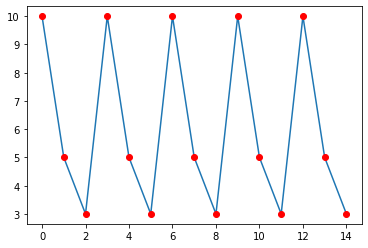

In [47]:
# first, we create a mock time series

#t = np.linspace(0, 10*np.pi, 100) 
#y1 = np.sin(t) 
#y2 = np.cos(3*t) 
#y = y1+0.25*y2 

y = np.array([10, 5, 3, 10, 5, 3, 10, 5, 3, 10, 5, 3, 10, 5, 3,])
t = np.array(range(len(y)))
plt.figure() 
plt.plot(t, y, ) 
plt.plot(t, y, 'ro')
plt.show()

To create a visibility graph, we connect any two data points $(t_a, y_a)$ and $(t_b, y_b)$ if for any $t_c\in(t_a, t_b)$,

$$ y_c < y_b + (y_a-y_b)\dfrac{t_b-t_c}{t_b-t_a}$$

In [48]:
# begin by initializing adjacency matrix to zeros 

Adjacency = np.zeros((len(y), len(y)))

In [49]:
# define function to check if two values of time series are visible to one another

def isVisible(l, r, t, y): 
    if l > r: 
        temp = l
        l = r 
        r = temp 
    if l == r: 
        return False
    else: 
        ta = t[l]
        ya = y[l] 
        tb = t[r]
        yb = y[r] 

        tc = t[l+1:r] 
        yc = y[l+1:r] 
        
        rhs = yb + (ya-yb)*((tb-tc)/(tb-ta))
        check = np.array(yc < rhs )
        return check.all()

Note: we could instead try using horizontal visibility graphs where each node can only look directly forwards or backwards. 

In [50]:
for i in range(len(y)): 
    ta = t[i]
    ya = y[i]
    
    for j in range(len(y)): 
        Adjacency[i, j] = isVisible(i, j, t, y)
    
display(Adjacency)

array([[0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.

In [51]:
# put everything together into one function: 
def getVisibilityGraph(t, y): 
    Adjacency = np.zeros((len(y), len(y)))
  
    for i in range(len(y)): 
        ta = t[i]
        ya = y[i]  
        for j in range(len(y)): 
            Adjacency[i, j] = isVisible(i, j, t, y)
            
    return Adjacency

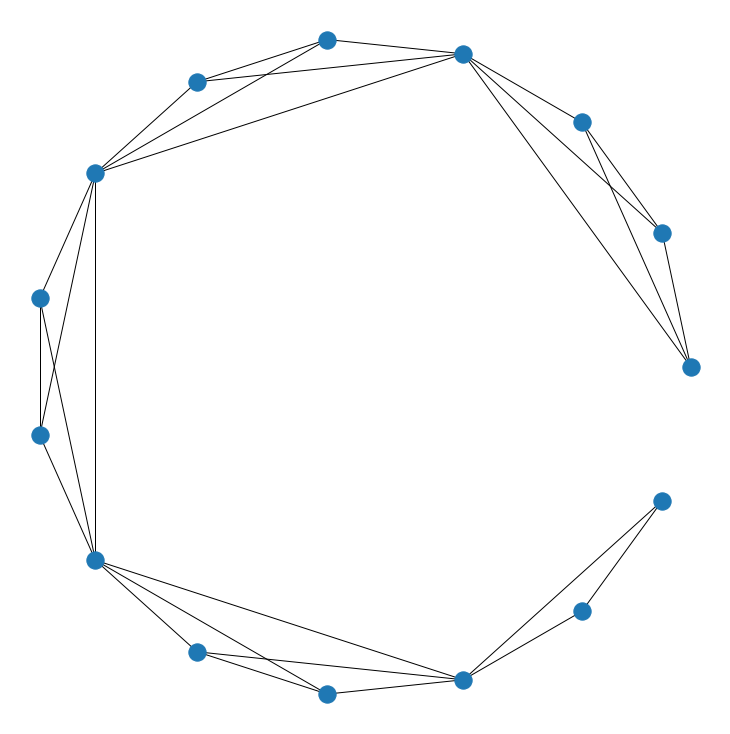

In [52]:
plt.figure(figsize=(10, 10))
G=nx.from_numpy_matrix(getVisibilityGraph(t, y))
pos = nx.circular_layout(G)
nx.draw(G, pos)
ax = plt.gca() 
ax.set_aspect('equal')

# 2. Computing graph spectrum 

Given the adjacency matrix $A$, we can compute it's eigenvalues to construct it's spectrum

In [53]:
A = getVisibilityGraph(t, y)
vals, vecs = np.linalg.eig(A)

plt.figure(figsize=(10,6)) 


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

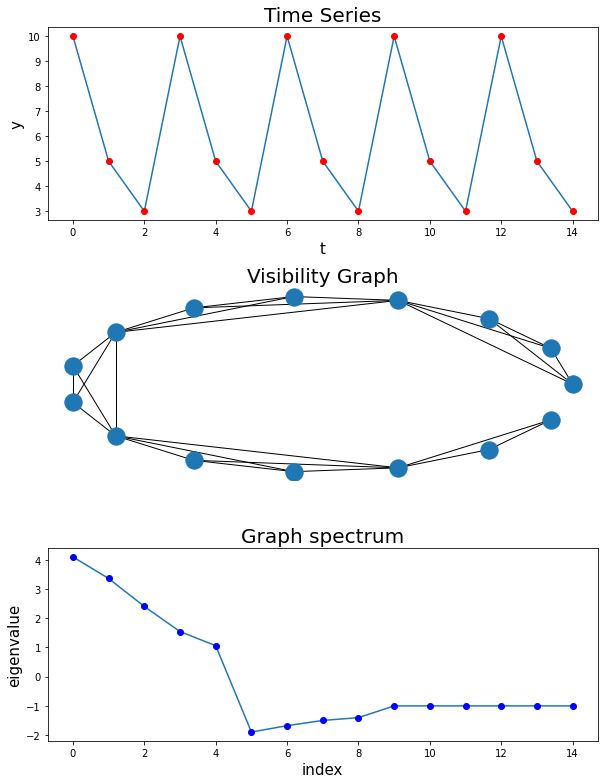

In [58]:
# Plot figure with subplots of different sizes
fig, ax = plt.subplots(3, 1, figsize=(8.5, 11)) 

ax[0].plot(t, y, ) 
ax[0].plot(t, y, 'ro')
ax[0].set_xlabel('t', fontsize=15)
ax[0].set_ylabel('y', fontsize=15)
ax[0].set_title('Time Series', fontsize=20)

ax[2].set_ylabel("eigenvalue",fontsize=15)
ax[2].set_xlabel("index", fontsize=15)
ax[2].set_title('Graph spectrum', fontsize=20)
ax[2].plot(vals)
ax[2].plot(vals, 'bo')

plt.sca(ax[1]) 
G=nx.from_numpy_matrix(getVisibilityGraph(t, y))
pos = nx.circular_layout(G)
nx.draw(G, pos)
plt.title('Visibility Graph', fontsize=20)


plt.tight_layout()

plt.savefig('../visibility-graph.pdf')